# 2019 Electronics Store Product Purchases Analysis


Data source: https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data


### Importing libraries

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# setting working directory path
pwd = os.getcwd()

### Data loading and preparation

In [2]:
# Data loading

# select data within directory
files = [file for file in os.listdir(pwd + "\\Original Data")]

# import files, using for loop to concatenate as single data frame
year_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(pwd + "\\Original Data\\" + file)
    year_data = pd.concat([df, year_data])

# inspect concatenated raw data
year_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [4]:
# Data preparation & cleaning

# Create updated dataframe to read from
year_data.to_csv(pwd + "\\year_data.csv", index=False)

# read from updated data frame
data = pd.read_csv(pwd + "\\year_data.csv")


# add month column
data["Month"] = data["Order Date"].astype(str).str[0:2]

# find out if any nulls, and drop them all
nan_data = data[data.isna().any(axis=1)]
nan_data                                    # lots of nulls

# drop nulls
data1 = data.dropna(how="any")  

# check if still present - No
data1[data1.isna().any(axis=1)]

# now stating there is an 'Or' within the month column - find & remove
data1_or = data1[data1["Order Date"].str[0:2] == "Or"]

#inspect data
data1_or          # lots of 'Or' rows

# remove all 'Or' rows
data2 = data1[data1["Order Date"].str[0:2] != "Or"]

# inspect data
data2 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09
...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",04
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",04
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",04
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",04


In [5]:
# Produce final data frame for analysis

# copy data
data2m = data2.copy()

# convert Month column to integer
data2m["Month"] = data2["Month"].astype("int32")

# copy data
data3 = data2m.copy()

# convert Price and Quantity columns to integer
data3["Quantity Ordered"] = pd.to_numeric(data2["Quantity Ordered"])
data3["Price Each"] = pd.to_numeric(data2["Price Each"])

# add Total Purchases column - Quantity * Price
data3["Purchases Total"] = data3["Quantity Ordered"] * data3["Price Each"]

# finalise data frame for analysis
data3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Purchases Total
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95
...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,600.00
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,3.84
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,5.98
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,3.84


### Data analysis questions

##### 1) What was the best month for sales, & how much was earned that month ?

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Purchases Total, dtype: float64


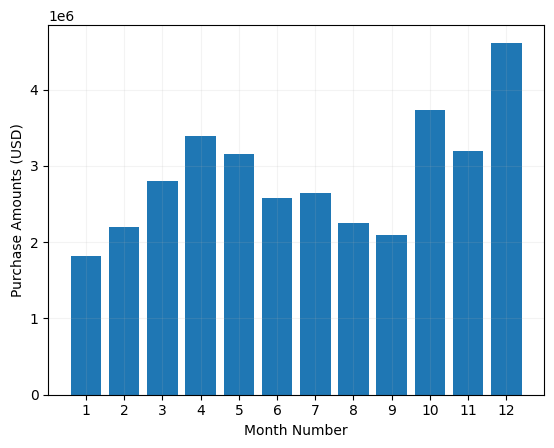

In [6]:
# Calculate monthly sales & plot results

# group by month & calculate sales amounts
monthly_total_purch = data3.groupby("Month")["Purchases Total"].sum()
print(monthly_total_purch)


# plot results as bar graph
months = range(1, 13)

plt.bar(months, monthly_total_purch)

plt.xticks(months)
plt.ylabel("Purchase Amounts (USD)")
plt.xlabel("Month Number")
plt.grid(alpha=0.15)

# show graph
plt.show()

- December was the best month with over 4.6 million USD in sales, most probably due to Christmas shopping.

##### 2) What US city had the highest number of sales ?

In [7]:
# Clean, split and recombine Purchase Address (string) data column

# expand "Purchase Address" column into split "Street", "City" and "Post Code" columns
data3[["Street", "City", "Post Code"]] = data3["Purchase Address"].str.split(",", expand=True)

# Post Code column contains 2-letter state code and ZIP code - clean up to only contain 2-letter state code
data3[["blank", "State", "ZIP"]] = data3["Post Code"].str.split(" ", expand=True)

# generate City (State) column
data3["City (State)"] = data3["City"] + " " + "(" + data3["State"] + ")"

# drop columns 'Post Code' & 'blank'
data3.drop(columns=["City", "Post Code", "blank"], axis=1, inplace=True)

# inspect final address split data frame
data3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Purchases Total,Street,State,ZIP,City (State)
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,380 North St,CA,90001,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,511 8th St,TX,73301,Austin (TX)
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,151 Johnson St,CA,90001,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,355 Hickory St,WA,98101,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,125 5th St,GA,30301,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,600.00,177 Jackson St,CA,90001,Los Angeles (CA)
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,3.84,311 Forest St,TX,73301,Austin (TX)
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,5.98,347 Sunset St,CA,94016,San Francisco (CA)
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,3.84,835 Lake St,OR,97035,Portland (OR)


City (State)
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Purchases Total, dtype: float64


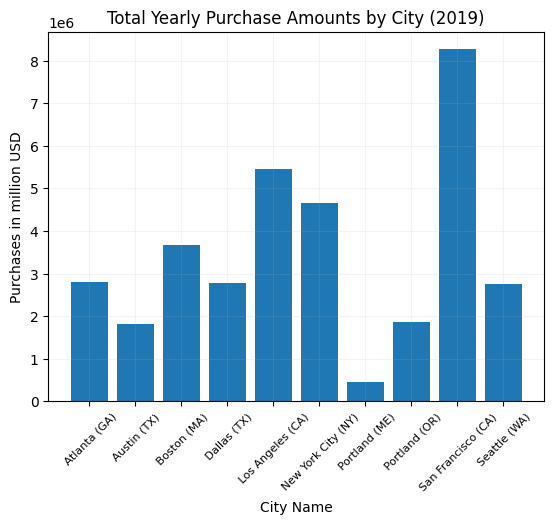

In [26]:

# Calculate total purchases by City and plot results

# group by city & State (as there are 2 cities named Portland) and calculate highest sales
city_purchases = data3.groupby(["City (State)"])["Purchases Total"].sum()

# view city sales data frame
print(city_purchases)


# plot results on bar graph
cities = [city for city, df in data3.groupby("City (State)")]       # ensure city list occurs in same order as sales numbers for bar graph

plt.bar(cities, city_purchases)

plt.title("Total Yearly Purchase Amounts by City (2019)")
plt.ylabel("Purchases in million USD")
plt.xticks(cities, rotation=45, size=8)
plt.xlabel("City Name")
plt.grid(alpha=0.15)

# show graph
plt.show()

- San Francisco is the city with the higest sales numbers (with over 8.25 million USD in sales)

#### 3) When should advertisements be displayed to maximise likelihood to influence customer conversion (product purchase/sale) ?

In [ ]:
# Create "Hour" column and calculate purchase amounts and volume

# copy data
data3_dt = data3.copy()

# Order Date column is an object - convert column to date time format
data3_dt["Order Date"] = pd.to_datetime(data3["Order Date"], format="mixed")

# add "Hour" column
data3_dt["Hour"] = data3_dt["Order Date"].dt.hour


# calculate most profitable hours
hour_sales = data3_dt.groupby("Hour")["Purchases Total"].sum()

# calculate highest sales volume hours
hour_sales_n = data3_dt.groupby("Hour")["Purchases Total"].count()

# inspect final Hour-labelled data frame
data3_dt

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Purchases Total,Street,State,ZIP,City (State),Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,380 North St,CA,90001,Los Angeles (CA),14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,511 8th St,TX,73301,Austin (TX),10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,151 Johnson St,CA,90001,Los Angeles (CA),17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,355 Hickory St,WA,98101,Seattle (WA),7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,125 5th St,GA,30301,Atlanta (GA),19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,600.00,177 Jackson St,CA,90001,Los Angeles (CA),17
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,3.84,311 Forest St,TX,73301,Austin (TX),16
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,5.98,347 Sunset St,CA,94016,San Francisco (CA),14
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,3.84,835 Lake St,OR,97035,Portland (OR),15


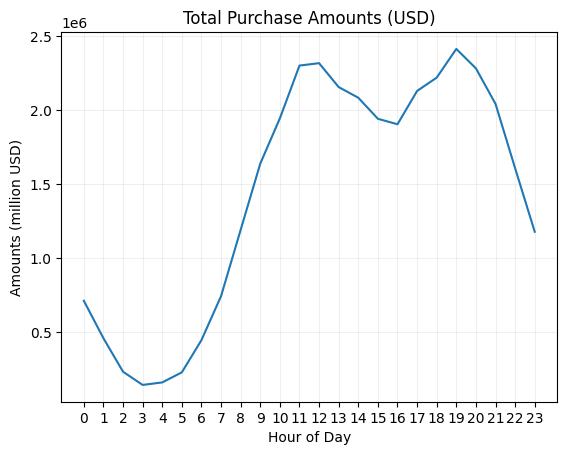

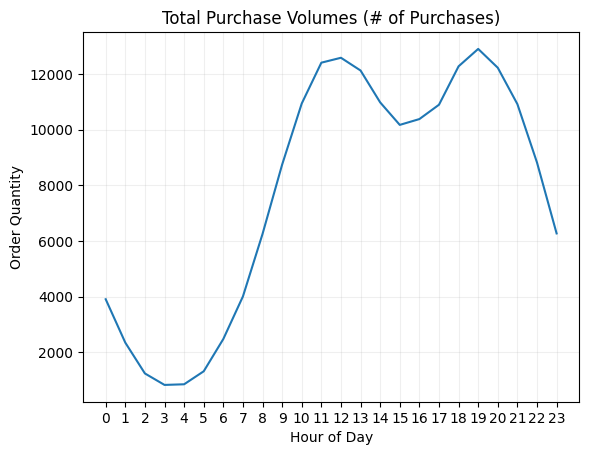

In [ ]:
# Plot results on line graphs

# generate 24 hours data
hours = [hour for hour, df in data3_dt.groupby("Hour")]

# plot sales amounts per hour
plt.plot(hours, hour_sales)

plt.title("Total Purchase Amounts (USD)")
plt.ylabel("Amounts (million USD)")
plt.xlabel("Hour of Day")
plt.xticks(hours)
plt.grid(alpha=0.2)

# show graph
plt.show()


# plot sales volume per hour
plt.plot(hours, hour_sales_n)

plt.title("Total Purchase Volumes (# of Purchases)")
plt.ylabel("Order Quantity")
plt.xlabel("Hour of Day")
plt.xticks(hours)
plt.grid(alpha=0.2)

# show graph
plt.show()

- The highest sales amounts and numbers occurr between 10 am and 1pm, and then again between 6 and 8 pm.

The best time to push advertisment would be between 9 am and 12 pm, as well as between 5 and 7 pm, in order to catch as many views as possible in hours leading up to max purchase periods.

#### 4) Basket Analysis - What items are most often bought together ?

In [ ]:
# Create data frame of products bought together

# find all duplicate Order IDs (indicating orders with multiple products), and keep all (keep=False) to conserve Product ordered data
duplicates = data3[data3["Order ID"].duplicated(keep=False)]

# copy data
duplicates2 = duplicates.copy()

# group all items from same order into single order row separated by a comma
duplicates2["Grouped"] = duplicates.groupby("Order ID")["Product"].transform(
                                                lambda x: ", ".join(x))

# remove duplicate rows and select columns of interest
duplicates_filtered = duplicates2[["Order ID", "Grouped"]].drop_duplicates()

# inspect products bought together data frame
duplicates_filtered

,Order ID,Grouped
20,248171,"USB-C Charging Cable, USB-C Charging Cable"
60,248210,"iPhone, Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones, Google Phone"
117,248265,"Vareebadd Phone, Bose SoundSport Headphones"
176,248323,"Google Phone, Bose SoundSport Headphones"
...,...,...
186758,194008,"AA Batteries (4-pack), Wired Headphones"
186772,194021,"Google Phone, Wired Headphones"
186802,194050,"AA Batteries (4-pack), USB-C Charging Cable"
186809,194056,"iPhone, Lightning Charging Cable"


In [ ]:
# Count each unique product pairs or triplets most often bought together

# import required functions
from itertools import combinations
from collections import Counter

# count number of times pairs (2 products) were bought together
count_p = Counter()

for row in duplicates_filtered["Grouped"]:
    row_list = row.split(",")
    count_p.update(Counter(combinations(row_list, 2)))        # count pairs (2)


# count number of times triplets (3 products) were bought together
count_t = Counter()

for row in duplicates_filtered["Grouped"]:
    row_list = row.split(",")
    count_t.update(Counter(combinations(row_list, 3)))        # count triplets (3)


# get 10 most common item pairs and triplets bought together
print(count_p.most_common(10))
print(count_t.most_common(10))

[(('iPhone', ' Lightning Charging Cable'), 1005), (('Google Phone', ' USB-C Charging Cable'), 987), (('iPhone', ' Wired Headphones'), 447), (('Google Phone', ' Wired Headphones'), 414), (('Vareebadd Phone', ' USB-C Charging Cable'), 361), (('iPhone', ' Apple Airpods Headphones'), 360), (('Google Phone', ' Bose SoundSport Headphones'), 220), (('Vareebadd Phone', ' Wired Headphones'), 143), ((' USB-C Charging Cable', ' Wired Headphones'), 120), (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]
[(('Google Phone', ' USB-C Charging Cable', ' Wired Headphones'), 87), (('iPhone', ' Lightning Charging Cable', ' Wired Headphones'), 62), (('iPhone', ' Lightning Charging Cable', ' Apple Airpods Headphones'), 47), (('Google Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones'), 35), (('Vareebadd Phone', ' USB-C Charging Cable', ' Wired Headphones'), 33), (('iPhone', ' Apple Airpods Headphones', ' Wired Headphones'), 27), (('Google Phone', ' Bose SoundSport Headphones', ' Wired He

Both from pairs and triplets, the most commonly bought together items are iPhones, Wired Headphones and USB-C Charging Cables

#### 5) What was the most purchased product, and why was it bought the most ?

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


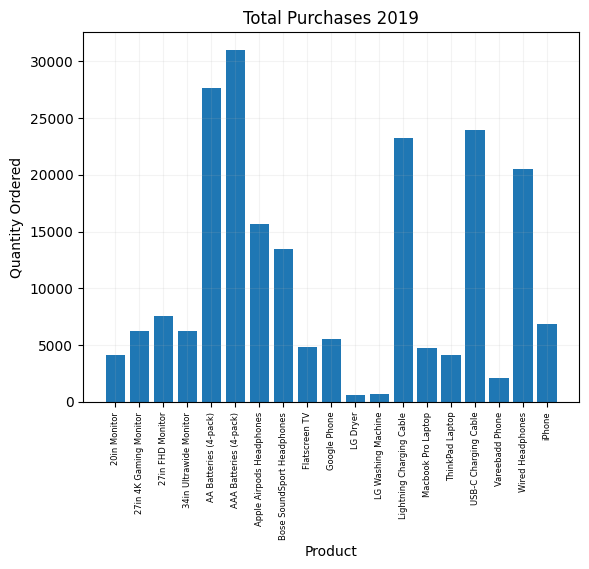

In [ ]:
# Calculate most purchased product and plot on bar graph

# group by Product and calculate total sales
most_purchased = data3.groupby("Product")["Quantity Ordered"].sum()

print(most_purchased)


# plot bar graphs
items = [item for item, df in data3.groupby("Product")]

plt.bar(items, most_purchased)

plt.title("Total Purchases 2019")
plt.ylabel("Quantity Ordered")
plt.xticks(items, rotation=90, size=6)
plt.xlabel("Product")
plt.grid(alpha=0.15)

# show graph
plt.show()

AAA Batteries (4-pack) was the most sold product, with 31,017 individual items sold in 2019

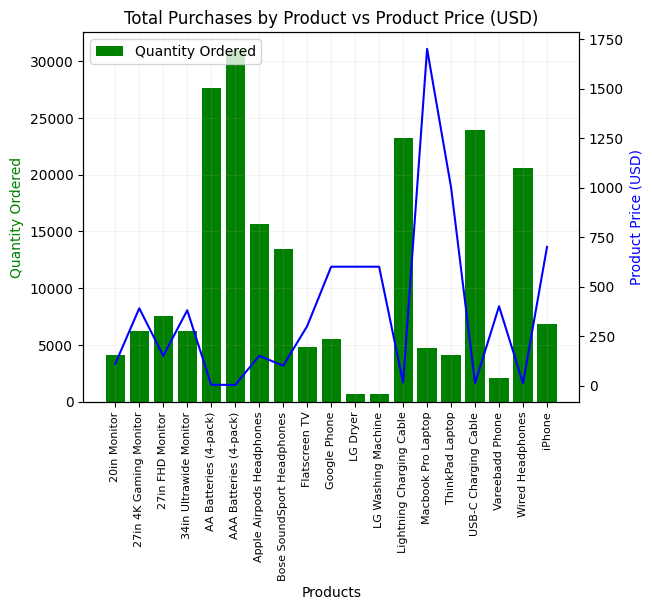

In [ ]:
# Overlay Total Purchases data to respective item price

# get average price each item was sold for during the year
prices = data3.groupby("Product")["Price Each"].mean()


# overlay price data on the number of sales bar plot
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(items, most_purchased, color="g")
ax2.plot(items, prices, "b-")

ax1.set_title("Total Purchases by Product vs Product Price (USD)")
ax1.set_xlabel("Products")
ax1.set_xticks(items)
ax1.set_xticklabels(items, rotation="vertical", size=8)
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Product Price (USD)", color="b")
ax1.legend(["Quantity Ordered"], loc="upper left")
ax1.grid(alpha=0.15)

# show graph
plt.show()

Lower priced item show much higher quantities purchased, while higher priced items show lower quantities purchased. 

Reason for batteries to be the most purchased item may therefore be linked to their ubiquitous use in many electronic appliances but also to their low cost.

#### 6) Is there periodicity in the cumulative rates of purchases - When are customers most active ?

In [ ]:
# Sort values by date, pivot table to wide format and calculate cumulative sales

# copy data
cumsales_d = data3.copy()

# remove time stamp from date-time format keeping date only
cumsales_d["Order Date"] = pd.to_datetime(data3["Order Date"], 
                                          format="mixed").dt.normalize()


# pivot table to create columns for each product and calculate cumulative sum
cumsales_pvt = cumsales_d.pivot_table(index="Order Date", columns="Product",
                                        values="Quantity Ordered", 
                                        fill_value=0, aggfunc="sum").cumsum().reset_index()

# inspect final cumulative purchases data frame
cumsales_pvt

Product,Order Date,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
0,2019-01-01,4,7,8,18,33,61,21,15,9,12,1,2,42,9,9,43,2,31,16
1,2019-01-02,13,21,25,26,87,104,56,34,18,24,4,3,78,18,20,79,4,66,31
2,2019-01-03,19,35,41,38,131,144,77,58,23,32,5,6,121,22,23,122,5,97,42
3,2019-01-04,26,43,56,49,161,185,101,74,33,43,8,7,157,32,31,179,12,125,49
4,2019-01-05,31,56,72,57,211,248,124,97,38,54,8,8,198,36,38,209,13,172,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2019-12-28,4060,6175,7457,6135,27255,30539,15451,13291,4750,5464,637,654,22934,4670,4062,23649,2028,20291,6768
362,2019-12-29,4082,6202,7486,6152,27377,30687,15536,13348,4773,5489,640,658,23037,4692,4083,23760,2040,20386,6796
363,2019-12-30,4102,6229,7524,6177,27496,30846,15606,13408,4795,5513,642,661,23127,4712,4102,23868,2057,20463,6824
364,2019-12-31,4126,6243,7547,6199,27635,31012,15657,13454,4818,5531,646,666,23211,4727,4128,23971,2067,20553,6847


Index(['Order Date', '20in Monitor', '27in 4K Gaming Monitor',
       '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')


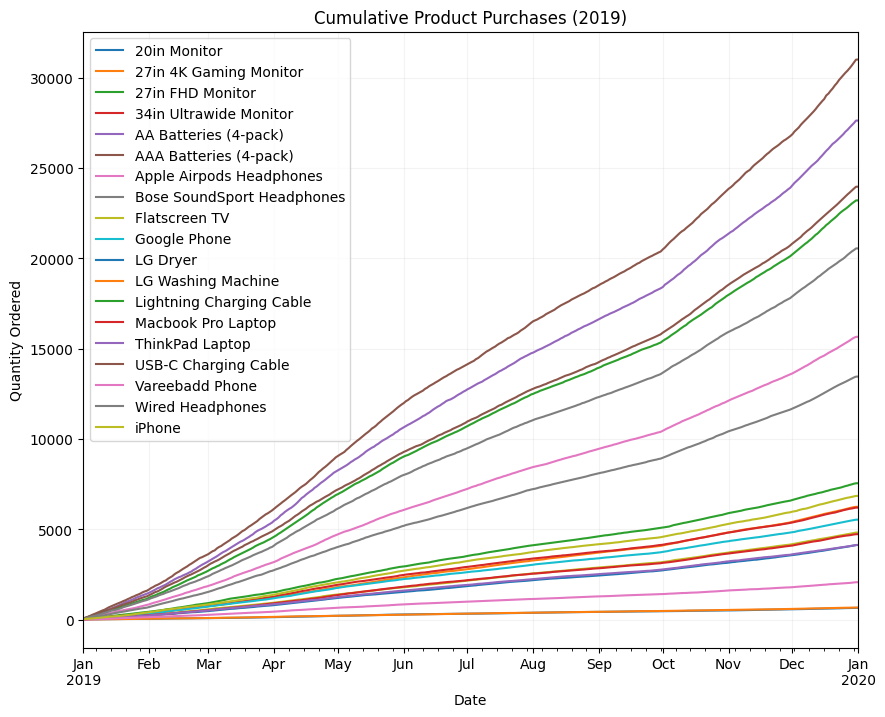

In [ ]:
# Plot cumulative sales for each Product item

# select data columns from list for calculations
print(cumsales_pvt.columns)

col_calculations = ['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone']


# plot data cumulative data for each Product
cumsales_pvt.plot(kind="line", x="Order Date", y=col_calculations, figsize=(10,8))

plt.title("Cumulative Product Purchases (2019)")
plt.ylabel("Quantity Ordered")
plt.xlabel("Date")
plt.grid(alpha=0.15)
plt.legend(loc="best")

# show graph
plt.show()

The rates of product purchases (line slopes) increase most rapidly at two different points during the year: *February until May*, and then again in *October - November*. These trend can be seen across most (if not all) products.

The periodicity in the rates of purchase may thus be explained by:
1. An initially slower rate of purchase in the first month and a half (Jan - Feb) following over-spending for Christmas/New Years in the previous month.
2. The rate of purchases increase again from February (second pay-check of the year), most notably for inexpensive accessories such as cables, batteries etc.
3. These rates of purchases slow down at the begining of the summer (May/June) as customers are either absent (Summer holidays) or saving to travel.
4. Rates of purchases remain slower until October, at which point rates of purchases increase again (most notably for more expensive items - gifts?) as customers prepare for the fast approaching Christmas period.

Insights:
 - Purchasing power at lowest level in January.
 - Purchases pick up from February, but mostly for lower priced items, and remain high throughout the spring.
 - Purchases then slow down again during the summer across all products.
 - Christmas shopping appears to start in earnest towards the begining of October, both in terms of volume of purchases as well as in greater purchases of higher-value items (such as laptops and phones), meaning advertisement compaigns should start prior to this dperiod for maximum impact.